In [ ]:
import json

# Path to annotations JSON file
annotations_file = 'annotations.json'

# Load the JSON data
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

# Step 1: Check the top-level keys
print("Top-level keys:", annotations.keys())

# Step 2: Inspect the first few entries in the 'annotations' section
print("Number of annotations:", len(annotations['annotations']))
print("First annotation entry:", json.dumps(annotations['annotations'][0], indent=4))

# Inspect the first few entries in the 'images' section
print("First images entry:", json.dumps(annotations['images'][0], indent=4))

Top-level keys: dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])
Number of annotations: 38414
First annotation entry: {
    "id": 1,
    "image_id": 1,
    "category_id": 3,
    "segmentation": {
        "counts": [
            858927,
            7,
            1322,
            23,
            1306,
            34,
            1298,
            36,
            1296,
            39,
            1292,
            42,
            1291,
            43,
            1289,
            45,
            1287,
            47,
            1285,
            48,
            1285,
            49,
            1283,
            51,
            1281,
            53,
            1280,
            54,
            1278,
            56,
            1277,
            56,
            1277,
            57,
            1275,
            58,
            1274,
            60,
            1273,
            61,
            1272,
            61,
            1272,
            62,
            1

In [4]:
from collections import Counter

# Access the list of annotation entries
annotation_entries = annotations['annotations']  # Now this should be a list of dictionaries

# Extract the category_id for each annotation
category_ids = [annotation['category_id'] for annotation in annotation_entries]

# Count the occurrences of each category_id
category_counts = Counter(category_ids)

# Display the result
print("Category ID Counts:")
for category_id, count in category_counts.items():
    print(f"Category ID {category_id}: {count} annotations")

Category ID Counts:
Category ID 3: 8526 annotations
Category ID 2: 21087 annotations
Category ID 1: 8801 annotations


In [5]:
# Assuming annotations is the main dictionary containing all dataset information
category_mapping = {category['id']: category['name'] for category in annotations['categories']}

# Display the category mapping
print("Category ID Mapping:")
for category_id, name in category_mapping.items():
    print(f"Category ID {category_id}: {name}")

Category ID Mapping:
Category ID 1: turtle
Category ID 2: flipper
Category ID 3: head


In [ ]:
import os

# Base directory where the images are stored
image_base_dir = 'images/'

# Load all image paths (recursive)
image_paths = []
for root, dirs, files in os.walk(image_base_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.JPG') or file.endswith('.jpeg'):  # Adjust file formats as needed
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images.")
print(image_paths[0])

Found 8729 images.
/home/data2/zkj/llt_code/data/images/t413/wulzIZJFHj.jpg


In [7]:
# Create a mapping from image_id to file_name from the 'images' section
image_id_to_filename = {}
for image_info in annotations['images']:
    image_id = image_info['id']           # Image ID in 'images' section
    file_name = image_info['file_name']   # Corresponding file name
    image_id_to_filename[image_id] = file_name

# Create a mapping from file names to lists of annotations using image_id
annotations_dict = {}
for annotation in annotations['annotations']:
    image_id = annotation['image_id']  # Get image_id from the annotation
    image_file_name = image_id_to_filename[image_id]  # Look up file name using image_id

    # Initialize a list if the image has no annotations yet
    if image_file_name not in annotations_dict:
        annotations_dict[image_file_name] = []

    # Append each annotation to the corresponding image’s list of annotations
    annotations_dict[image_file_name].append(annotation)

# Print some sample data
print(f"Number of unique images with annotations: {len(annotations_dict)}")
print(f"Example annotations for {list(annotations_dict.keys())[0]}:")
for ann in annotations_dict[list(annotations_dict.keys())[0]]:
    print(ann)

# Find images that have no annotations
images_without_annotations = [file_name for file_name in image_id_to_filename.values() if file_name not in annotations_dict]

# Print the filenames of images without annotations
print(f"\nNumber of images without annotations: {len(images_without_annotations)}")
print("Filenames of images without annotations:")
for file_name in images_without_annotations:
    print(file_name)

Number of unique images with annotations: 8726
Example annotations for images/t001/CAluWEgwPX.JPG:
{'id': 1, 'image_id': 1, 'category_id': 3, 'segmentation': {'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}, 'area': 4065.0, 'bbox': [644.0, 441.0, 70.0, 78.0], 'iscrowd': 1, 'attributes

In [8]:
!pip install pycocotools
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 24.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.9 MB/s eta 0:00:00


loading annotations into memory...
Done (t=5.41s)
creating index...
index created!
Number of annotations for image images/t221/wXxaQqJIQN.JPG = 0


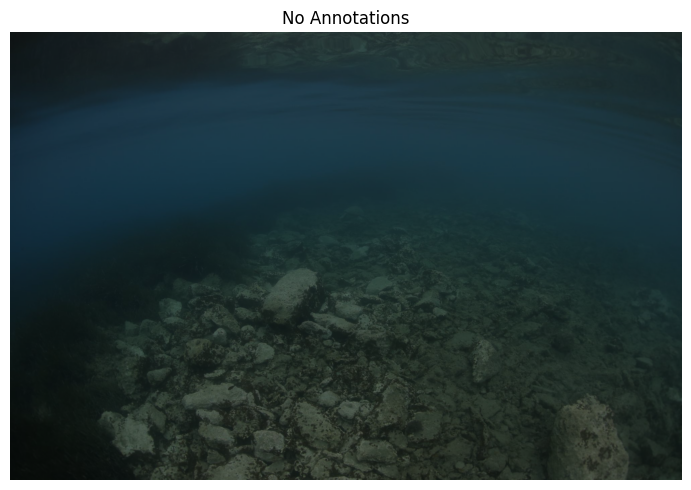

Number of annotations for image images/t522/xulOLaCSKj.JPG = 0


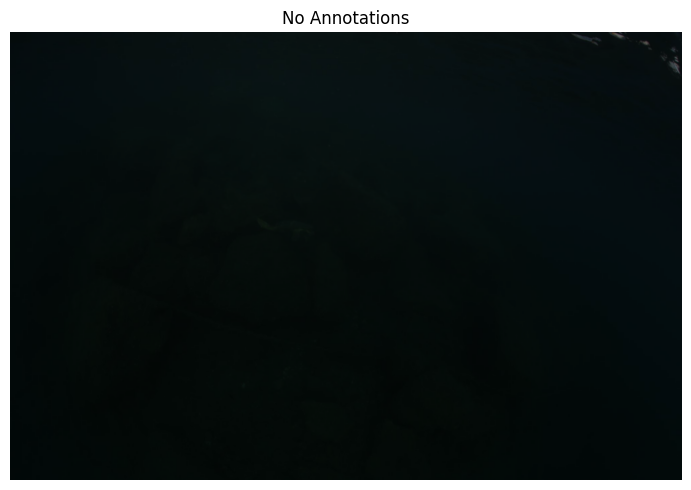

Number of annotations for image images/t500/YFCPGMJkJg.jpeg = 0


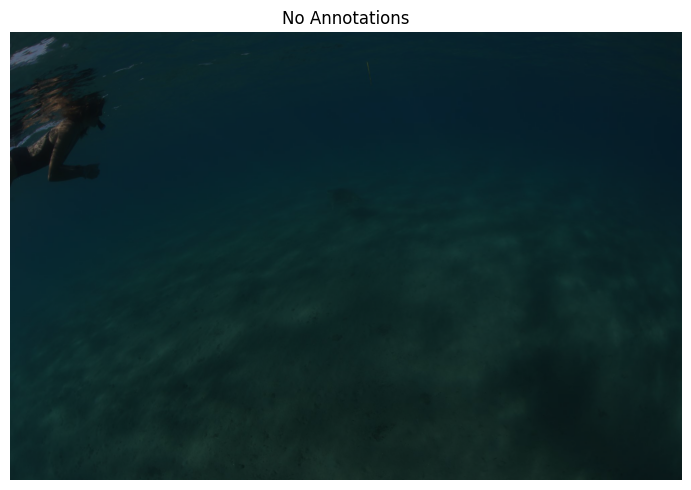

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from pycocotools.coco import COCO
import os

# Define file paths
annotations_file = 'annotations.json'
image_base_dir = 'data/'

# Initialize COCO API
coco = COCO(annotations_file)

# List of filenames with no annotations
image_filenames_without_annotations = [
    'images/t221/wXxaQqJIQN.JPG',
    'images/t522/xulOLaCSKj.JPG',
    'images/t500/YFCPGMJkJg.jpeg'
]

# Loop through each image with no annotations
for filename in image_filenames_without_annotations:
    # Find the image ID based on the filename
    image_id = None
    for img in coco.imgs.values():
        if img['file_name'] == filename:
            image_id = img['id']
            break

    if image_id is None:
        print(f"Image {filename} not found in COCO dataset.")
        continue

    # Load and display the original image
    image_path = os.path.join(image_base_dir, filename)
    image = np.array(Image.open(image_path))

    # Retrieve all annotation IDs for the given image (should be empty)
    anns_ids = coco.getAnnIds(imgIds=image_id, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    
    print(f'Number of annotations for image {filename} = {len(anns)}')

    # Determine number of subplots
    if len(anns) > 0:
        num_plots = len(anns) + 1
    else:
        num_plots = 1

    fig, axs = plt.subplots(1, num_plots, figsize=(15, 5))

    # Ensure axs is always an array for consistency
    if num_plots == 1:
        axs = [axs]  # Make axs a list if it's a single plot

    axs[0].imshow(image)
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    # If there are no annotations, show a blank mask with a message
    if len(anns) == 0:
        blank_mask = np.zeros_like(image)  # Create a blank mask with the same shape as the image
        axs[0].imshow(blank_mask, alpha=0.5)  # Overlay a blank mask for clarity
        axs[0].set_title("No Annotations")
    else:
        # Loop over each annotation and visualize it separately
        for i, ann in enumerate(anns):
            # Generate the binary mask for the current annotation
            mask = coco.annToMask(ann)

            # Create a copy of the original image and apply the mask
            masked_image = image.copy()
            masked_image[mask == 0] = 0  # Set all non-annotation areas to black

            # Display each annotated region with the corresponding category name
            axs[i + 1].imshow(masked_image)
            category_name = coco.loadCats(ann['category_id'])[0]['name']
            axs[i + 1].set_title(f"Category: {category_name}")
            axs[i + 1].axis("off")

    plt.tight_layout()
    plt.show()

In [11]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.7 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd
import os

# Load the metadata_splits.csv file
metadata_file = 'metadata_splits.csv'
metadata_df = pd.read_csv(metadata_file)

# Step 2: Pick split column
split_column = 'split_open'

# Step 3: Create the train, valid, and test splits based on the selected split column
train_df = metadata_df[metadata_df[split_column] == 'train']
valid_df = metadata_df[metadata_df[split_column] == 'valid']
test_df = metadata_df[metadata_df[split_column] == 'test']

# Filter each split to include only images that have annotations
train_image_paths = [img for img in train_df['file_name'] if img in annotations_dict]
valid_image_paths = [img for img in valid_df['file_name'] if img in annotations_dict]
test_image_paths = [img for img in test_df['file_name'] if img in annotations_dict]

# Create filtered annotation dictionaries for each split, keeping the list of annotations
train_annotations = {k: annotations_dict[k] for k in train_image_paths if k in annotations_dict}
valid_annotations = {k: annotations_dict[k] for k in valid_image_paths if k in annotations_dict}
test_annotations = {k: annotations_dict[k] for k in test_image_paths if k in annotations_dict}

# Count the total number of annotations in each split
train_annotation_count = sum(len(ann_list) for ann_list in train_annotations.values())
valid_annotation_count = sum(len(ann_list) for ann_list in valid_annotations.values())
test_annotation_count = sum(len(ann_list) for ann_list in test_annotations.values())

# Print the split summary
print(f"Training set contains {len(train_annotations)} images and {train_annotation_count} annotations.")
print(f"Validation set contains {len(valid_annotations)} images and {valid_annotation_count} annotations.")
print(f"Test set contains {len(test_annotations)} images and {test_annotation_count} annotations.")

print(f"Total images in metadata: {len(metadata_df)}")

Training set contains 5302 images and 23304 annotations.
Validation set contains 1118 images and 4935 annotations.
Test set contains 2306 images and 10175 annotations.
Total images in metadata: 8729


In [10]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import pycocotools.mask as maskUtils
import numpy as np
import os

class TurtleSegmentationDataset(Dataset):
    def __init__(self, image_paths, annotations_dict, transform=None, image_size=(256, 256), base_dir='/home/data2/zkj/llt_code/data/'):
        self.transform = transform
        self.image_size = image_size
        self.base_dir = base_dir
        self.image_paths = []
        self.annotations = []

        # Collect paths and annotations
        for img_path in image_paths:
            if img_path in annotations_dict and os.path.isfile(os.path.join(self.base_dir, img_path)):
                self.image_paths.append(img_path)
                self.annotations.append(annotations_dict[img_path])
            else:
                print(f"Annotation not found for image: {img_path}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        full_path = os.path.join(self.base_dir, img_path)
        image = Image.open(full_path).convert("RGB").resize(self.image_size)

        # Initialize masks for each category
        mask_head = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)
        mask_flippers = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)
        mask_turtle = np.zeros((self.image_size[0], self.image_size[1]), dtype=np.uint8)

        # Apply each annotation's mask to the correct category-specific mask
        for annotation in self.annotations[idx]:
            category_id = annotation['category_id']
            segmentation = annotation['segmentation']

            # Check if segmentation is in uncompressed RLE format
            if isinstance(segmentation, dict) and 'counts' in segmentation and isinstance(segmentation['counts'], list):
                # Convert uncompressed RLE to compressed RLE
                rle = maskUtils.frPyObjects([segmentation], *segmentation['size'])[0]
            else:
                rle = segmentation  # Already in compressed format

            # Decode the segmentation mask (RLE encoded)
            rle_mask = maskUtils.decode(rle)
            rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))

            # Assign each category to its respective mask
            if category_id == 1:  # Turtle body
                mask_turtle[rle_mask_resized == 1] = 1
            elif category_id == 2:  # Flippers
                mask_flippers[rle_mask_resized == 1] = 2
            elif category_id == 3:  # Head
                mask_head[rle_mask_resized == 1] = 3

        # Combine masks: head and flippers take precedence over the turtle body
        mask = np.maximum(mask_turtle, mask_flippers)  # Ensure flippers overlay body
        mask = np.maximum(mask, mask_head)  # Ensure head overlays both body and flippers

        # Convert image and mask to tensors
        image = transforms.ToTensor()(image)
        mask = torch.from_numpy(mask).long()  # Use long for CrossEntropyLoss

        if self.transform:
            image = self.transform(image)

        return image, mask

In [14]:
!pip install segmentation_models_pytorch

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=478ec99521bf200ea102f4d73f9e4d5a2aa25726286f9437c19559c428d197f7
  Stored in directory: /home/data2/zkj/.cache/pip/wheels/84/b9/90/25a0195cf95fb5533db96f1c77ea3f296b7cc86ae8ae48e3dc
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=6c297203aed77a7e5a91d3c6a6583b82791cb5365798485ae4f36a74ce9e419b
  Stored in directory: /home/data2/zkj/.cache/pip/wheels/ed/fa/b9/5c82b59d905f95542a192b883c0cc0082407ea2f54beb2f9e6
Successfully built efficientnet-pytorch pretrainedmodels


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# CBAM模块
class CBAM(nn.Module):
    def __init__(self, channels, reduction=2, kernel_size=5):
        super(CBAM, self).__init__()
        
        # 通道注意力模块
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels // reduction, 1, bias=False),
            nn.ReLU(),
            nn.Conv2d(channels // reduction, channels, 1, bias=False),
            nn.Sigmoid()
        )
        
        # 空间注意力模块
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(2, 1, kernel_size, padding=kernel_size // 2, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        # 通道注意力
        x_channel = x * self.channel_attention(x)
        
        # 空间注意力
        max_pool = torch.max(x_channel, dim=1, keepdim=True)[0]
        avg_pool = torch.mean(x_channel, dim=1, keepdim=True)
        x_space = torch.cat([max_pool, avg_pool], dim=1)
        x_spatial = x_channel * self.spatial_attention(x_space)
        
        return x_spatial

In [17]:
from segmentation_models_pytorch.encoders import get_encoder
import segmentation_models_pytorch as smp

class UNetWithCBAM(smp.Unet):
    def __init__(self, encoder_name="resnet34", encoder_weights="imagenet", classes=1, activation=None):
        super(UNetWithCBAM, self).__init__(encoder_name=encoder_name, encoder_weights=encoder_weights, classes=classes, activation=activation)
        
        # 在 encoder 各层后嵌入 CBAM 模块
        self.encoder.layer1.add_module("cbam_enc1", CBAM(64))  # Encoder第1层
        self.encoder.layer2.add_module("cbam_enc2", CBAM(128))  # Encoder第2层
        self.encoder.layer3.add_module("cbam_enc3", CBAM(256))  # Encoder第3层
        self.encoder.layer4.add_module("cbam_enc4", CBAM(512))  # Encoder第4层

In [18]:
import segmentation_models_pytorch as smp
import torch.optim as optim
import torch.nn as nn

# Define the U-Net model with a pre-trained ResNet34 backbone
# model = smp.Unet(
#     encoder_name="resnet34",
#     encoder_weights="imagenet",     # Use ImageNet pre-trained weights
#     in_channels=3,                  # Input channels (RGB)
#     classes=4,                      # Output classes (background, head, body, flippers)
#     activation=None           # No softmax applied here; handled by CrossEntropyLoss
# )
model = UNetWithCBAM(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    # in_channels=3,
    classes=4
)


# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Print model summary (optional)
print(model)

UNetWithCBAM(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=Tru

/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


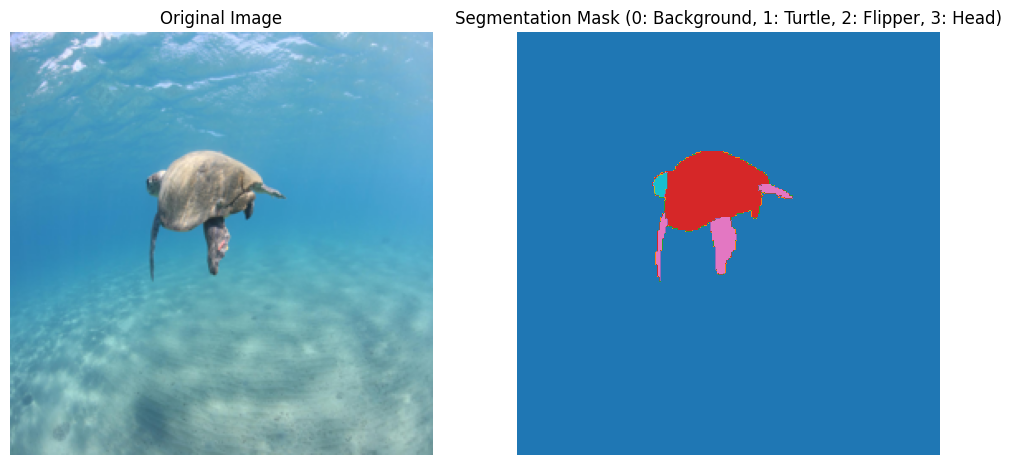

In [19]:
# Create train dataset and take first element out of it
train_dataset = TurtleSegmentationDataset(train_image_paths, train_annotations, image_size=(256, 256))

import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image

# Choose an index to visualize
index = 0  # Change this to visualize a different image-mask pair

# Load the image and mask from the dataset
image, mask = train_dataset[index]  # Assuming train_dataset is already initialized as TurtleSegmentationDataset

# Convert the image tensor back to a numpy array for visualization
image_np = image.permute(1, 2, 0).cpu().numpy()  # Convert CxHxW to HxWxC for plotting
mask_np = mask.cpu().numpy()  # Convert mask tensor to numpy

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(image_np)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Visualize the mask by using a color map (cmap) for clarity
axs[1].imshow(mask_np, cmap="tab10", vmin=0, vmax=3)  # Use discrete colors for classes
axs[1].set_title("Segmentation Mask (0: Background, 1: Turtle, 2: Flipper, 3: Head)")
axs[1].axis("off")

plt.show()

In [20]:
from torch.utils.data import DataLoader
import torch
import time

# Create datasets
train_dataset = TurtleSegmentationDataset(train_image_paths, train_annotations, image_size=(256, 256))
valid_dataset = TurtleSegmentationDataset(valid_image_paths, valid_annotations, image_size=(256, 256))

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers = 2)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False, num_workers = 2)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training loop
num_epochs = 10  # Set the number of epochs
loss_history = []
criterion = nn.CrossEntropyLoss()
total_batches = len(train_loader)

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    print(f'Starting epoch {epoch + 1} / {num_epochs}')

    # Training phase
    # Adjust the loss function


    for batch_idx, (images, masks) in enumerate(train_loader, 1):
        start_time = time.time()
        images = images.to(device)
        masks = masks.to(device)
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, masks)  # CrossEntropyLoss expects integer labels

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item() * images.size(0)

        # Print progress every 10 batches
        if batch_idx % 10 == 0:
          print(f"Batch {batch_idx}/{total_batches} - Loss: {loss.item():.4f} - Time: {time.time() - start_time:.2f}s")

    # Average loss over training data
    avg_training_loss = running_loss / len(train_loader.dataset)
    loss_history.append(avg_training_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Training Loss: {avg_training_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # No need to track gradients during validation
        for images, masks in valid_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)

            val_loss += loss.item() * images.size(0)

    avg_val_loss = val_loss / len(valid_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")

Starting epoch 1 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 1.1748 - Time: 0.14s
Batch 20/166 - Loss: 0.7950 - Time: 0.14s
Batch 30/166 - Loss: 0.4953 - Time: 0.14s
Batch 40/166 - Loss: 0.3628 - Time: 0.14s
Batch 50/166 - Loss: 0.2147 - Time: 0.14s
Batch 60/166 - Loss: 0.1917 - Time: 0.14s
Batch 70/166 - Loss: 0.1396 - Time: 0.14s
Batch 80/166 - Loss: 0.1430 - Time: 0.14s
Batch 90/166 - Loss: 0.1519 - Time: 0.14s
Batch 100/166 - Loss: 0.1164 - Time: 0.14s
Batch 110/166 - Loss: 0.0880 - Time: 0.14s
Batch 120/166 - Loss: 0.1214 - Time: 0.14s
Batch 130/166 - Loss: 0.0921 - Time: 0.14s
Batch 140/166 - Loss: 0.1009 - Time: 0.14s
Batch 150/166 - Loss: 0.0982 - Time: 0.14s
Batch 160/166 - Loss: 0.0858 - Time: 0.14s
Epoch [1/10], Average Training Loss: 0.3043


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [1/10], Validation Loss: 0.1015
Starting epoch 2 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0809 - Time: 0.14s
Batch 20/166 - Loss: 0.0888 - Time: 0.14s
Batch 30/166 - Loss: 0.0771 - Time: 0.14s
Batch 40/166 - Loss: 0.1136 - Time: 0.14s
Batch 50/166 - Loss: 0.0754 - Time: 0.14s
Batch 60/166 - Loss: 0.0653 - Time: 0.14s
Batch 70/166 - Loss: 0.1086 - Time: 0.14s
Batch 80/166 - Loss: 0.0678 - Time: 0.14s
Batch 90/166 - Loss: 0.0643 - Time: 0.14s
Batch 100/166 - Loss: 0.0620 - Time: 0.14s
Batch 110/166 - Loss: 0.0452 - Time: 0.14s
Batch 120/166 - Loss: 0.0442 - Time: 0.14s
Batch 130/166 - Loss: 0.0889 - Time: 0.14s
Batch 140/166 - Loss: 0.0569 - Time: 0.14s
Batch 150/166 - Loss: 0.0652 - Time: 0.14s
Batch 160/166 - Loss: 0.0451 - Time: 0.14s
Epoch [2/10], Average Training Loss: 0.0766


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [2/10], Validation Loss: 0.0626
Starting epoch 3 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0636 - Time: 0.15s
Batch 20/166 - Loss: 0.0594 - Time: 0.15s
Batch 30/166 - Loss: 0.0577 - Time: 0.14s
Batch 40/166 - Loss: 0.0554 - Time: 0.14s
Batch 50/166 - Loss: 0.0409 - Time: 0.14s
Batch 60/166 - Loss: 0.0706 - Time: 0.14s
Batch 70/166 - Loss: 0.0385 - Time: 0.14s
Batch 80/166 - Loss: 0.0400 - Time: 0.14s
Batch 90/166 - Loss: 0.0431 - Time: 0.14s
Batch 100/166 - Loss: 0.0453 - Time: 0.15s
Batch 110/166 - Loss: 0.0422 - Time: 0.14s
Batch 120/166 - Loss: 0.0388 - Time: 0.14s
Batch 130/166 - Loss: 0.0622 - Time: 0.14s
Batch 140/166 - Loss: 0.1198 - Time: 0.14s
Batch 150/166 - Loss: 0.0614 - Time: 0.15s
Batch 160/166 - Loss: 0.0479 - Time: 0.14s
Epoch [3/10], Average Training Loss: 0.0517


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [3/10], Validation Loss: 0.0484
Starting epoch 4 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0300 - Time: 0.15s
Batch 20/166 - Loss: 0.0317 - Time: 0.14s
Batch 30/166 - Loss: 0.0341 - Time: 0.14s
Batch 40/166 - Loss: 0.0343 - Time: 0.14s
Batch 50/166 - Loss: 0.0303 - Time: 0.14s
Batch 60/166 - Loss: 0.0397 - Time: 0.14s
Batch 70/166 - Loss: 0.0424 - Time: 0.14s
Batch 80/166 - Loss: 0.0286 - Time: 0.14s
Batch 90/166 - Loss: 0.0324 - Time: 0.15s
Batch 100/166 - Loss: 0.0307 - Time: 0.14s
Batch 110/166 - Loss: 0.0426 - Time: 0.14s
Batch 120/166 - Loss: 0.0351 - Time: 0.14s
Batch 130/166 - Loss: 0.0353 - Time: 0.14s
Batch 140/166 - Loss: 0.0465 - Time: 0.15s
Batch 150/166 - Loss: 0.0809 - Time: 0.15s
Batch 160/166 - Loss: 0.0381 - Time: 0.14s
Epoch [4/10], Average Training Loss: 0.0400


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [4/10], Validation Loss: 0.0726
Starting epoch 5 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0369 - Time: 0.15s
Batch 20/166 - Loss: 0.0492 - Time: 0.14s
Batch 30/166 - Loss: 0.0387 - Time: 0.15s
Batch 40/166 - Loss: 0.0327 - Time: 0.15s
Batch 50/166 - Loss: 0.0286 - Time: 0.15s
Batch 60/166 - Loss: 0.0280 - Time: 0.15s
Batch 70/166 - Loss: 0.0284 - Time: 0.15s
Batch 80/166 - Loss: 0.0259 - Time: 0.15s
Batch 90/166 - Loss: 0.0376 - Time: 0.15s
Batch 100/166 - Loss: 0.0432 - Time: 0.15s
Batch 110/166 - Loss: 0.0586 - Time: 0.15s
Batch 120/166 - Loss: 0.0256 - Time: 0.15s
Batch 130/166 - Loss: 0.0676 - Time: 0.15s
Batch 140/166 - Loss: 0.0466 - Time: 0.15s
Batch 150/166 - Loss: 0.0348 - Time: 0.15s
Batch 160/166 - Loss: 0.0318 - Time: 0.15s
Epoch [5/10], Average Training Loss: 0.0375


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [5/10], Validation Loss: 0.0431
Starting epoch 6 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0357 - Time: 0.15s
Batch 20/166 - Loss: 0.0315 - Time: 0.15s
Batch 30/166 - Loss: 0.0436 - Time: 0.15s
Batch 40/166 - Loss: 0.0262 - Time: 0.14s
Batch 50/166 - Loss: 0.0386 - Time: 0.14s
Batch 60/166 - Loss: 0.0401 - Time: 0.14s
Batch 70/166 - Loss: 0.0270 - Time: 0.14s
Batch 80/166 - Loss: 0.0242 - Time: 0.14s
Batch 90/166 - Loss: 0.0303 - Time: 0.14s
Batch 100/166 - Loss: 0.0287 - Time: 0.15s
Batch 110/166 - Loss: 0.0300 - Time: 0.15s
Batch 120/166 - Loss: 0.0280 - Time: 0.14s
Batch 130/166 - Loss: 0.0432 - Time: 0.14s
Batch 140/166 - Loss: 0.0363 - Time: 0.15s
Batch 150/166 - Loss: 0.0374 - Time: 0.14s
Batch 160/166 - Loss: 0.0372 - Time: 0.15s
Epoch [6/10], Average Training Loss: 0.0326


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [6/10], Validation Loss: 0.0352
Starting epoch 7 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0266 - Time: 0.14s
Batch 20/166 - Loss: 0.0179 - Time: 0.14s
Batch 30/166 - Loss: 0.0218 - Time: 0.14s
Batch 40/166 - Loss: 0.0210 - Time: 0.14s
Batch 50/166 - Loss: 0.0246 - Time: 0.14s
Batch 60/166 - Loss: 0.0272 - Time: 0.14s
Batch 70/166 - Loss: 0.0224 - Time: 0.14s
Batch 80/166 - Loss: 0.0533 - Time: 0.14s
Batch 90/166 - Loss: 0.0779 - Time: 0.14s
Batch 100/166 - Loss: 0.0376 - Time: 0.14s
Batch 110/166 - Loss: 0.0698 - Time: 0.14s
Batch 120/166 - Loss: 0.0503 - Time: 0.14s
Batch 130/166 - Loss: 0.0347 - Time: 0.14s
Batch 140/166 - Loss: 0.0367 - Time: 0.14s
Batch 150/166 - Loss: 0.0275 - Time: 0.14s
Batch 160/166 - Loss: 0.0280 - Time: 0.14s
Epoch [7/10], Average Training Loss: 0.0362


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [7/10], Validation Loss: 0.0418
Starting epoch 8 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0279 - Time: 0.15s
Batch 20/166 - Loss: 0.0403 - Time: 0.14s
Batch 30/166 - Loss: 0.0434 - Time: 0.14s
Batch 40/166 - Loss: 0.0484 - Time: 0.15s
Batch 50/166 - Loss: 0.0328 - Time: 0.15s
Batch 60/166 - Loss: 0.0250 - Time: 0.15s
Batch 70/166 - Loss: 0.0271 - Time: 0.15s
Batch 80/166 - Loss: 0.0206 - Time: 0.14s
Batch 90/166 - Loss: 0.0282 - Time: 0.14s
Batch 100/166 - Loss: 0.0296 - Time: 0.15s
Batch 110/166 - Loss: 0.0290 - Time: 0.14s
Batch 120/166 - Loss: 0.0210 - Time: 0.15s
Batch 130/166 - Loss: 0.0246 - Time: 0.15s
Batch 140/166 - Loss: 0.0226 - Time: 0.14s
Batch 150/166 - Loss: 0.0232 - Time: 0.14s
Batch 160/166 - Loss: 0.0241 - Time: 0.15s
Epoch [8/10], Average Training Loss: 0.0298


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [8/10], Validation Loss: 0.0291
Starting epoch 9 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0207 - Time: 0.15s
Batch 20/166 - Loss: 0.0212 - Time: 0.15s
Batch 30/166 - Loss: 0.0219 - Time: 0.15s
Batch 40/166 - Loss: 0.0185 - Time: 0.15s
Batch 50/166 - Loss: 0.0221 - Time: 0.15s
Batch 60/166 - Loss: 0.0316 - Time: 0.15s
Batch 70/166 - Loss: 0.0259 - Time: 0.14s
Batch 80/166 - Loss: 0.0245 - Time: 0.14s
Batch 90/166 - Loss: 0.0197 - Time: 0.15s
Batch 100/166 - Loss: 0.0345 - Time: 0.14s
Batch 110/166 - Loss: 0.0478 - Time: 0.15s
Batch 120/166 - Loss: 0.0201 - Time: 0.15s
Batch 130/166 - Loss: 0.0399 - Time: 0.14s
Batch 140/166 - Loss: 0.0269 - Time: 0.15s
Batch 150/166 - Loss: 0.0206 - Time: 0.15s
Batch 160/166 - Loss: 0.0312 - Time: 0.14s
Epoch [9/10], Average Training Loss: 0.0263


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [9/10], Validation Loss: 0.0296
Starting epoch 10 / 10


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Batch 10/166 - Loss: 0.0314 - Time: 0.15s
Batch 20/166 - Loss: 0.0252 - Time: 0.15s
Batch 30/166 - Loss: 0.0249 - Time: 0.14s
Batch 40/166 - Loss: 0.0232 - Time: 0.15s
Batch 50/166 - Loss: 0.0170 - Time: 0.15s
Batch 60/166 - Loss: 0.0210 - Time: 0.14s
Batch 70/166 - Loss: 0.0210 - Time: 0.14s
Batch 80/166 - Loss: 0.0196 - Time: 0.14s
Batch 90/166 - Loss: 0.0203 - Time: 0.14s
Batch 100/166 - Loss: 0.0200 - Time: 0.14s
Batch 110/166 - Loss: 0.0343 - Time: 0.14s
Batch 120/166 - Loss: 0.0257 - Time: 0.14s
Batch 130/166 - Loss: 0.0245 - Time: 0.14s
Batch 140/166 - Loss: 0.0216 - Time: 0.15s
Batch 150/166 - Loss: 0.0225 - Time: 0.14s
Batch 160/166 - Loss: 0.0262 - Time: 0.14s
Epoch [10/10], Average Training Loss: 0.0224


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Epoch [10/10], Validation Loss: 0.0299


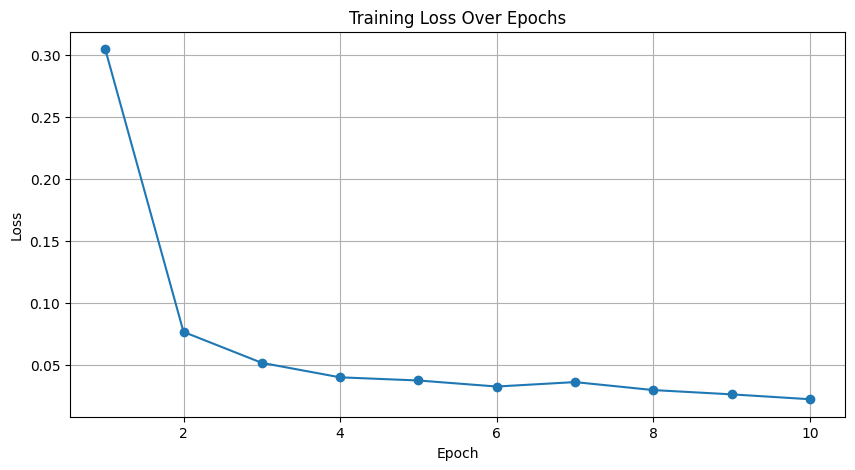

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [24]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 21.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 33.2 MB/s eta 0:00:0000:0100:01


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


Average Test Loss: 0.0324


/tmp/ipykernel_1615388/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))


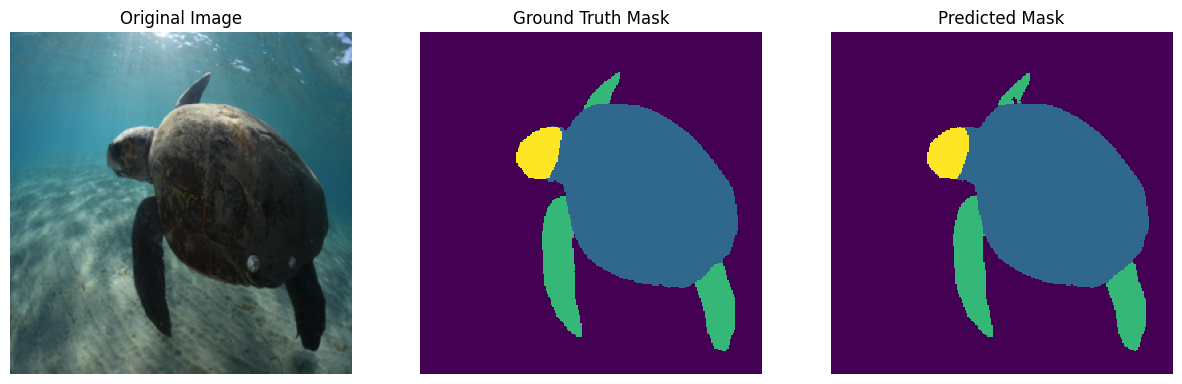

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import jaccard_score  # IoU for each class if desired

# Assuming you have defined the file paths and annotations for the test set
test_dataset = TurtleSegmentationDataset(test_image_paths, test_annotations, image_size=(256, 256))

# Set a higher batch size for faster evaluation (4 or 8 can be a good balance)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Evaluation Function
def evaluate_model(model, test_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_loss = 0.0

    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            masks = masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)
    print(f"Average Test Loss: {avg_loss:.4f}")

# Visualization Function
def visualize_predictions(model, dataset, index, device):
    model.eval()
    image, ground_truth = dataset[index]
    image = image.to(device).unsqueeze(0)  # Add batch dimension

    with torch.no_grad():
        output = model(image)
        predicted_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

    # Move ground truth to CPU for visualization
    ground_truth = ground_truth.cpu().numpy()

    # Plotting the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image.squeeze().permute(1, 2, 0).cpu())  # Display the image
    axs[0].set_title("Original Image")
    axs[0].axis("off")

    axs[1].imshow(ground_truth, cmap="viridis", interpolation="nearest")
    axs[1].set_title("Ground Truth Mask")
    axs[1].axis("off")

    axs[2].imshow(predicted_mask, cmap="viridis", interpolation="nearest")
    axs[2].set_title("Predicted Mask")
    axs[2].axis("off")

    plt.show()

# Run evaluation
evaluate_model(model, test_loader, criterion, device)

# Visualize predictions
sample_index = 0  # Change this index to view different test samples
visualize_predictions(model, test_dataset, sample_index, device)

In [26]:
import torch
import numpy as np
from torch.utils.data import DataLoader

# Assuming your test dataset and model are already defined
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

# Define class IDs
class_ids = [1, 2, 3]  # head=1, turtle=2, flippers=3

# Helper function to compute IoU for a specific class
def compute_iou(pred, target, class_id):
    pred_binary = (pred == class_id).astype(np.uint8)
    target_binary = (target == class_id).astype(np.uint8)
    intersection = np.logical_and(pred_binary, target_binary).sum()
    union = np.logical_or(pred_binary, target_binary).sum()
    return intersection / union if union != 0 else 0

# Evaluation function to calculate mIoU
def evaluate_miou(model, test_loader, device):
    model.eval()
    # Dictionaries to accumulate IoU sums and counts for each class
    iou_sums = {class_id: 0 for class_id in class_ids}
    iou_counts = {class_id: 0 for class_id in class_ids}
    
    with torch.no_grad():
        for images, masks in test_loader:
            images = images.to(device)
            outputs = model(images)
            
            # Iterate over each sample in the batch
            for i in range(len(outputs)):
                pred_mask = torch.argmax(outputs[i], dim=0).cpu().numpy()  # Get predicted mask for this sample
                target_mask = masks[i].cpu().numpy()  # Get target mask for this sample
                
                # Calculate IoU for each class
                for class_id in class_ids:
                    iou = compute_iou(pred_mask, target_mask, class_id)
                    if iou > 0:  # Avoid counting classes not present in this image
                        iou_sums[class_id] += iou
                        iou_counts[class_id] += 1

    # Calculate mean IoU for each class
    iou_results = {class_id: (iou_sums[class_id] / iou_counts[class_id]) if iou_counts[class_id] > 0 else 0 for class_id in class_ids}
    
    # Print IoU for each class and overall mean IoU
    print("\nIntersection over Union (IoU):")
    class_names = ["turtle", "flippers", "head"]
    for class_id, class_name in zip(class_ids, class_names):
        print(f"IoU for {class_name}: {iou_results[class_id]:.3f}")
    
    # Calculate overall mIoU (mean of class-wise IoUs)
    overall_miou = np.mean(list(iou_results.values()))
    print(f"Overall mean IoU (mIoU): {overall_miou:.3f}")

# Call the evaluation function
evaluate_miou(model, test_loader, device)

/tmp/ipykernel_1578459/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))
/tmp/ipykernel_1578459/495571608.py:52: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rle_mask_resized = np.array(Image.fromarray(rle_mask).resize(self.image_size, Image.NEAREST))



Intersection over Union (IoU):
IoU for turtle: 0.883
IoU for flippers: 0.755
IoU for head: 0.789
Overall mean IoU (mIoU): 0.809
